In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

Goals:
* Train decision trees for regression and classification in sklearn
* Visualize a tree
* Observe high variance

## 1.1 Decision Trees: classification

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [3]:
print(X.shape)
print(np.unique(y))

(150, 4)
[0 1 2]


Train classification tree: sklearn estimator `DecisionTreeClassifier`

In [4]:
from sklearn.tree import DecisionTreeClassifier

# define a tree
tree = DecisionTreeClassifier()

# fit
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

We can nicely visualize the result using `plot_tree` function

[Text(418.5, 747.4499999999999, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(354.11538461538464, 611.55, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(482.8846153846154, 611.55, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(257.53846153846155, 475.65, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(128.76923076923077, 339.74999999999994, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(64.38461538461539, 203.8499999999999, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(193.15384615384616, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 339.74999999999994, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 203.8499999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 203.8499999999999, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.3076923

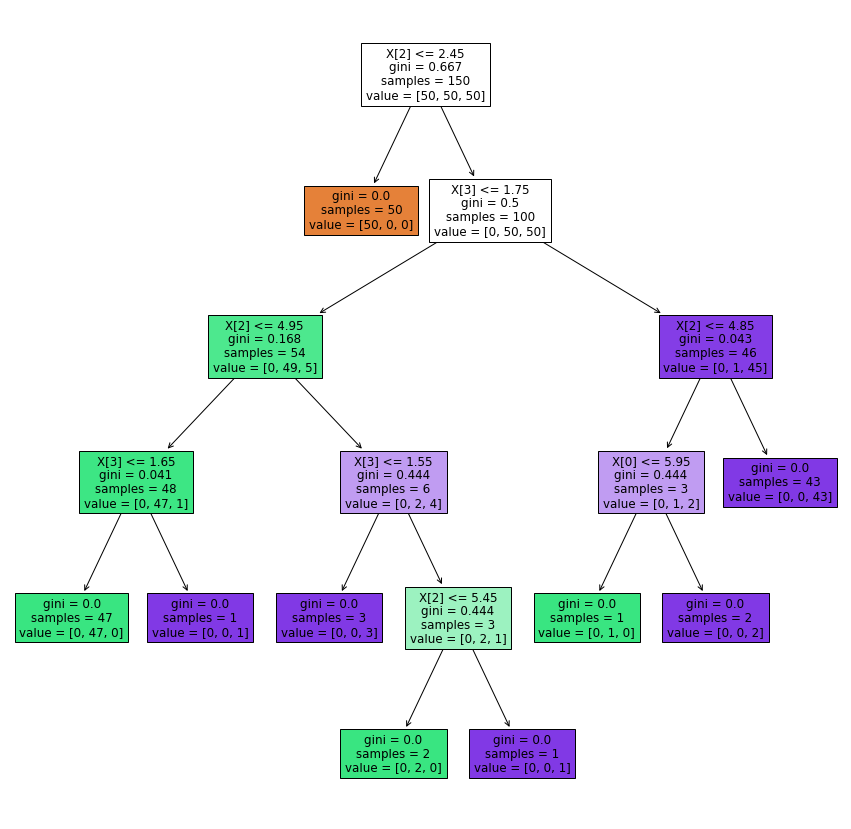

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(tree, filled=True)

## 1.2. Decision Trees: Regression

We will use synthetic 2d dataset in order to make some visualizations

In [14]:
X = np.random.normal(size=(100, 2))
y = (X[:, 0] ** 2 + X[:, 1] ** 2) ** 0.5

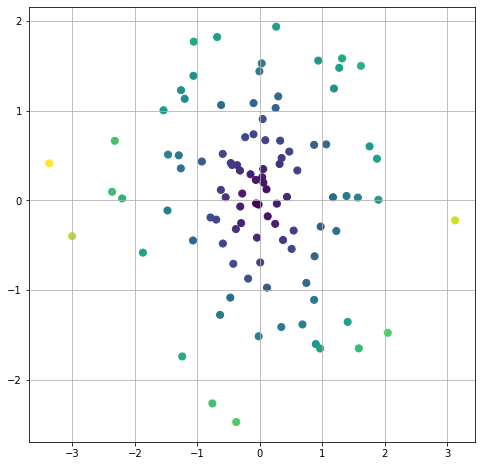

In [15]:
plt.figure(figsize=(8, 8));
plt.scatter(X[:, 0], X[:, 1], s=50, c=y);
plt.grid()

Split dataset into train and test, then fit regression tree

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y)

# fit the tree on the train dataset
reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Evaluate on the test data using MSE

In [17]:
from sklearn.metrics import mean_squared_error

y_pred = reg_tree.predict(X_test)
mean_squared_error(y_pred, y_test)

0.054244031037459194

We will now plot prediction of the resulting decision boundary

In [19]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

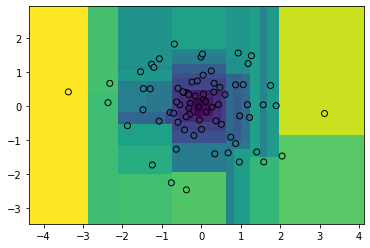

In [23]:
# plot decision boundary
x1, x2 = get_grid(X)
y_pred = reg_tree.predict(np.c_[x1.ravel(), x2.ravel()])

plt.pcolormesh(x1, x2, y_pred.reshape(x2.shape))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='black')


## 1.3 Observe High Variance

Let us try different train dataset and see how different the resulting tree will be

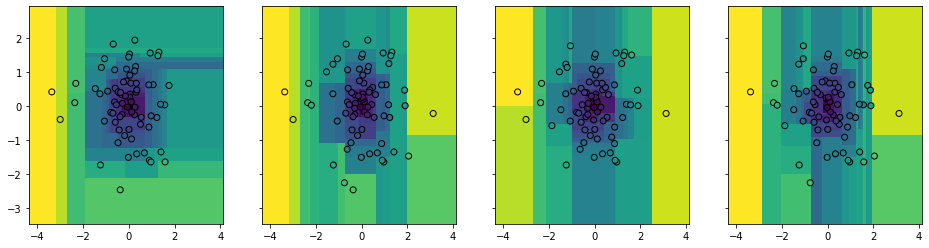

In [24]:
fig, ax = plt.subplots(ncols=4, sharey=True, figsize=(16, 4))
x1, x2 = get_grid(X)

for i in range(4):
    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # train the tree
    reg_tree = DecisionTreeRegressor()
    reg_tree.fit(X_train, y_train)
    
    # plot
    y_pred = reg_tree.predict(np.c_[x1.ravel(), x2.ravel()])

    ax[i].pcolormesh(x1, x2, y_pred.reshape(x2.shape))
    ax[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='black')

---
**[Optional task]**

## 1.4 Select hyperparameters on cross-validation

Read the documentation of the `DecisionTreeRegressor` to find out, which hyperparameters the model has and add ones that you find important to the `param_grid`. 

In [ ]:
# read the documentation
??DecisionTreeRegressor

In [10]:
from sklearn.model_selection import GridSearchCV

# use regression tree with default hyperparameters as a base model
model = DecisionTreeRegressor()

# define parameter grid
param_grid = {
    'criterion': ['mse', 'mae'],
    'max_depth': [1, 5, 10, 50],
    # YOUR CODE HERE (add model parameters)
}

#define grid search object
pipe_cv = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [13]:
# fit the grid_search object
pipe_cv.fit(X_train, y_train)

# print best estimator and its score on CV
# YOUR CODE HERE

In [ ]:
# use best estimator to predict on the test set
# YOUR CODE HERE

# compute MSE on the test set
# YOUR CODE HERE


## 1.5 Compare with Lasso and Ridge Regression. 

Use grid search to compare three models: `DecisionTreeRegressor`, `Lasso` and `Ridge`. 

Note that `DecisionTreeRegressor` has hyperparameters, which differ from `Lasso` and `Ridge`. Therefore, we'll have to use the list of 2 dictionaries to define `param_grid` for all the models. 

In [17]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

# use regression tree with default hyperparameters as a base model
model = Pipeline([
    ('model', DecisionTreeRegressor())
])

# define parameter grid (list of dictionaries)
param_grid = [
    # first dict - for the DecisionTree
    {
        'model': [DecisionTreeRegressor()],
        'model__criterion': ['mse', 'mae'],
        'model__max_depth': [1, 5, 10, 50],
        # YOUR CODE HERE (add model parameters)
    },
    # second dict - for Lasso and Ridge
    {
        'model': [Lasso(), Ridge()],
        # YOUR CODE HERE (add model parameters)
    }
]

#define grid search object
pipe_cv = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# fit the grid_search object


# print best estimator and its score on CV


In [ ]:
# use best estimator to predict on the test set

# compute MSE on the test set
